# 📊 Exploratory Data Analysis (EDA) — Rossmann Store Sales

### 🎯 Objetivo del análisis

El objetivo de este análisis exploratorio es comprender los patrones, relaciones y estructuras presentes en el conjunto de datos de ventas de las tiendas Rossmann, antes de construir modelos predictivos.

A través de visualizaciones y estadísticas descriptivas, buscamos:

- Entender la distribución de ventas y clientes
- Identificar outliers y valores atípicos
- Explorar relaciones entre variables como promociones, días de la semana, tipo de tienda, entre otras
- Detectar datos faltantes o inconsistentes
- Guiar la selección de variables para el modelado

---

### 📦 Fuente de datos

Los datos provienen de la competencia [Rossmann Store Sales](https://www.kaggle.com/competitions/rossmann-store-sales) en Kaggle, que contiene información histórica de ventas de más de 1,000 tiendas Rossmann en Alemania, junto con variables adicionales como:

- Información de cada tienda (`store.csv`)
- Fechas, promociones, vacaciones y ventas (`train.csv`)
- Información macro (`test.csv` y otros)

---

## Paso 1: Cargar datos e información general del dataset

In [2]:
# Cargar los datos
import pandas as pd

# Evitar warnings de tipo mixto (ej. StateHoliday)
train = pd.read_csv('data/train.csv', parse_dates=['Date'], dtype={'StateHoliday': str})
store = pd.read_csv('data/store.csv')

# Unir por Store
df = pd.merge(train, store, on='Store', how='left')

# Mostrar primeras filas
df.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [3]:
# Tamaño del dataset
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

# Tipos de datos y valores nulos
df.info()

# Estadísticas descriptivas de variables numéricas
df.describe()



Filas: 1017209, Columnas: 18
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  Competit

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,2014-04-11 01:30:42.846061824,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
min,1.000000e+00,1.000000e+00,2013-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,2013-08-17 00:00:00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,2014-04-02 00:00:00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,2014-12-12 00:00:00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,2015-07-31 00:00:00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870


## Paso 2: Verificar valores nulos

In [4]:
# Conteo de valores nulos por columna
df.isnull().sum().sort_values(ascending=False)


Promo2SinceWeek              508031
PromoInterval                508031
Promo2SinceYear              508031
CompetitionOpenSinceYear     323348
CompetitionOpenSinceMonth    323348
CompetitionDistance            2642
DayOfWeek                         0
Store                             0
Date                              0
Sales                             0
StoreType                         0
SchoolHoliday                     0
StateHoliday                      0
Promo                             0
Open                              0
Customers                         0
Assortment                        0
Promo2                            0
dtype: int64

## Paso 3: Visualizar distribución temporal de las ventas

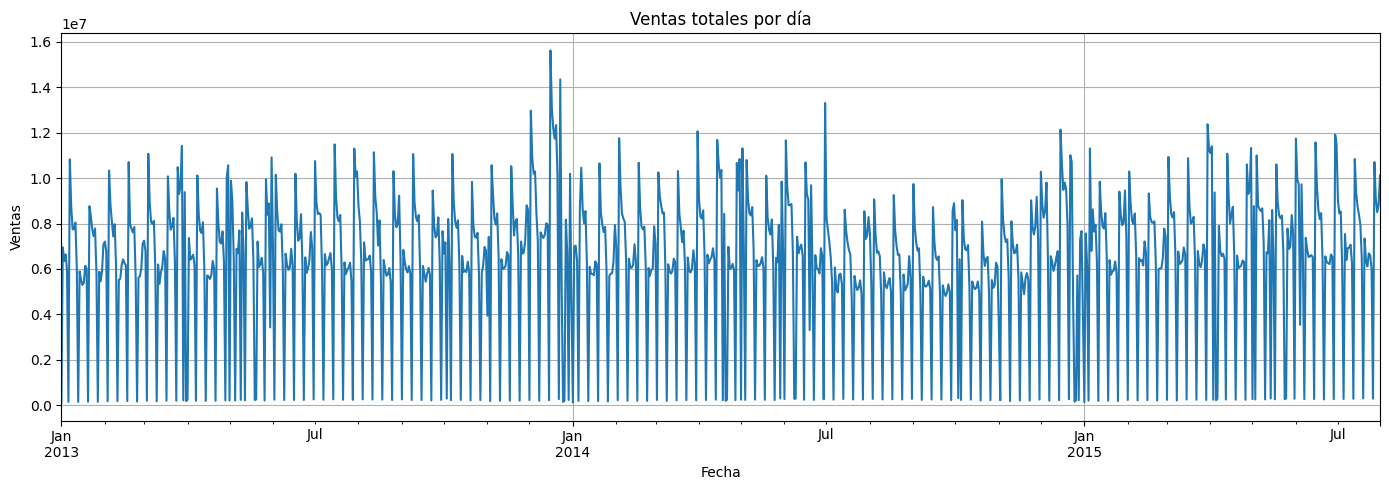

In [5]:
import matplotlib.pyplot as plt

# Ventas totales por día
ventas_diarias = df.groupby('Date')['Sales'].sum()

plt.figure(figsize=(14, 5))
ventas_diarias.plot()
plt.title('Ventas totales por día')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid(True)
plt.tight_layout()
plt.show()


##  Paso 4: Ventas promedio por tienda

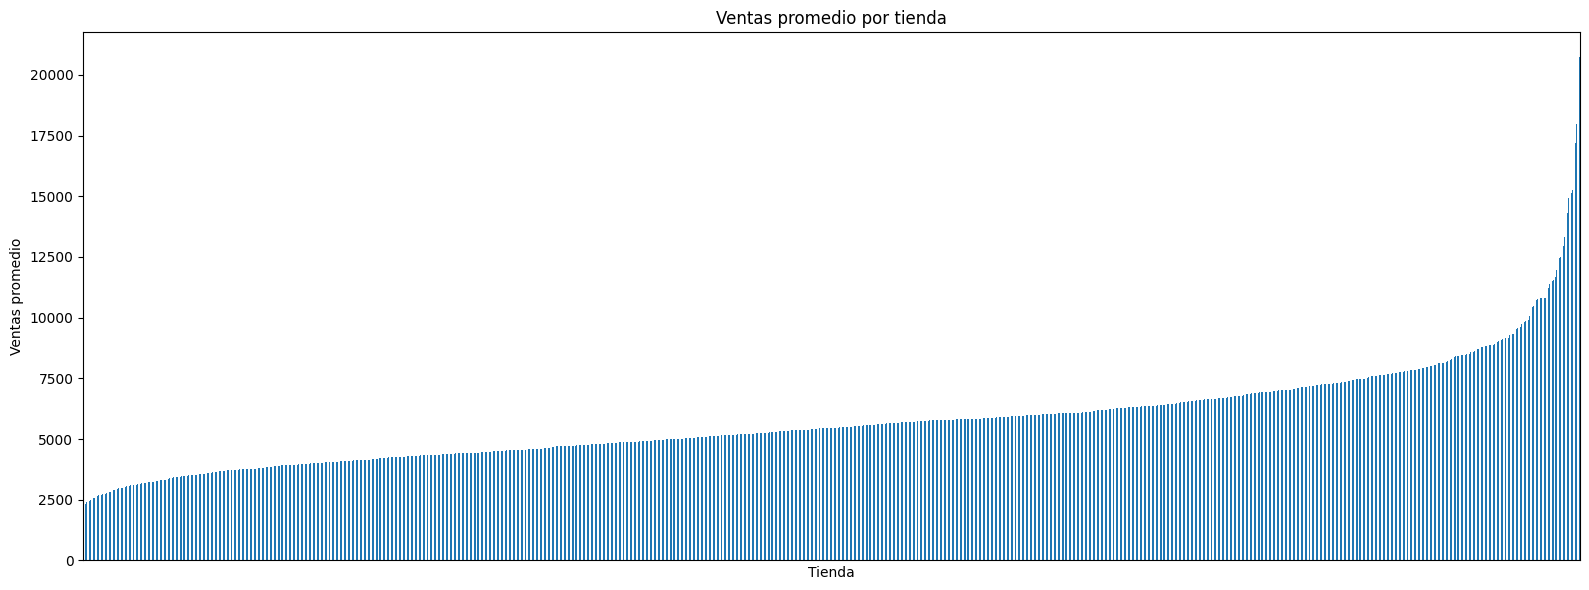

In [6]:
import matplotlib.pyplot as plt

# Calcular ventas promedio por tienda
ventas_promedio = df.groupby('Store')['Sales'].mean().sort_values()

# Ajustar tamaño de la figura
plt.figure(figsize=(16, 6))

# Crear gráfico de barras
ventas_promedio.plot(kind='bar')

# Títulos y etiquetas
plt.title('Ventas promedio por tienda')
plt.xlabel('Tienda')
plt.ylabel('Ventas promedio')

# Quitar los valores del eje x si son demasiados
plt.xticks([], [])  # Oculta los nombres de tienda si son muchos

# Mostrar gráfico
plt.tight_layout()
plt.show()



## Paso 5: Ventas por día de la semana

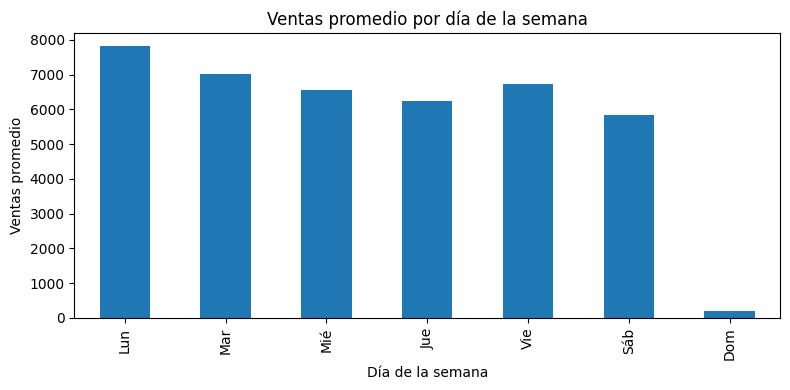

In [7]:
# Mapear días para mejor lectura
dias = {1:'Lun', 2:'Mar', 3:'Mié', 4:'Jue', 5:'Vie', 6:'Sáb', 7:'Dom'}
df['DayOfWeekName'] = df['DayOfWeek'].map(dias)

plt.figure(figsize=(8, 4))
df.groupby('DayOfWeekName')['Sales'].mean().reindex(['Lun','Mar','Mié','Jue','Vie','Sáb','Dom']).plot(kind='bar')
plt.title('Ventas promedio por día de la semana')
plt.ylabel('Ventas promedio')
plt.xlabel('Día de la semana')
plt.tight_layout()
plt.show()


## 📊 Paso 6: Análisis de Correlaciones

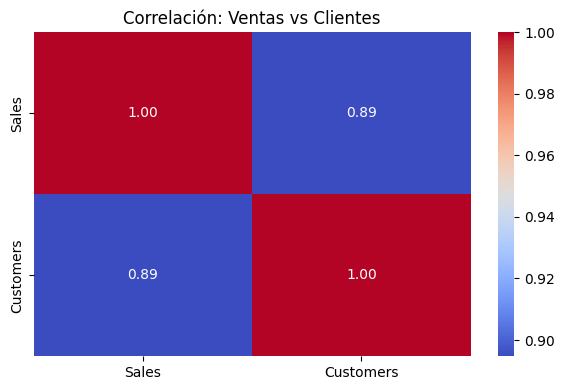

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlación entre Sales y Customers
corr = df[['Sales', 'Customers']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación: Ventas vs Clientes')
plt.tight_layout()
plt.show()


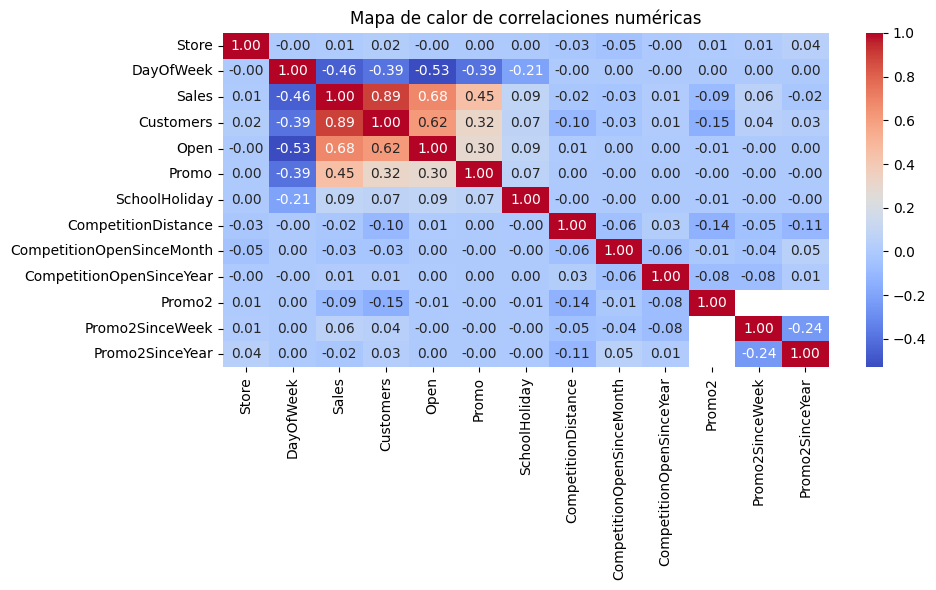

In [9]:
# Correlación entre todas las variables numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlaciones numéricas')
plt.tight_layout()
plt.show()


## 📈 Paso 7: Análisis de Distribuciones

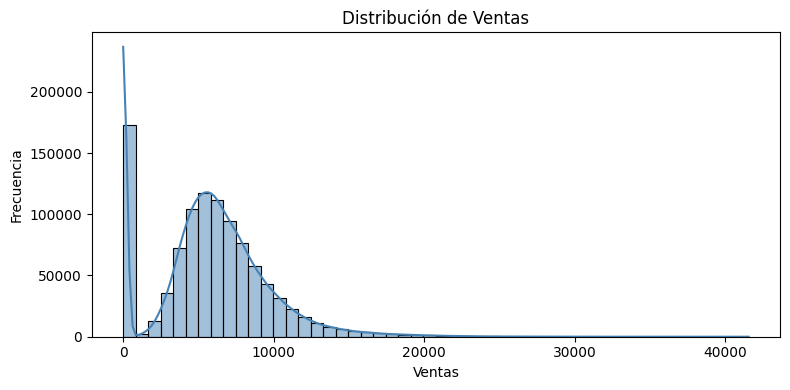

In [10]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Sales'], bins=50, kde=True, color='steelblue')
plt.title('Distribución de Ventas')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

### 🔍 Distribución de Ventas

La distribución original de las ventas presenta un pico muy pronunciado en **ventas igual a 0**, lo cual se debe a días en los que las tiendas estuvieron cerradas, esto distorsiona la visualización de la distribución real de ventas.

#### 🧼 Opción 1: Eliminar ventas igual a 0
Al eliminar esos valores, obtenemos una mejor idea de cómo se distribuyen las ventas **cuando hay actividad comercial**.

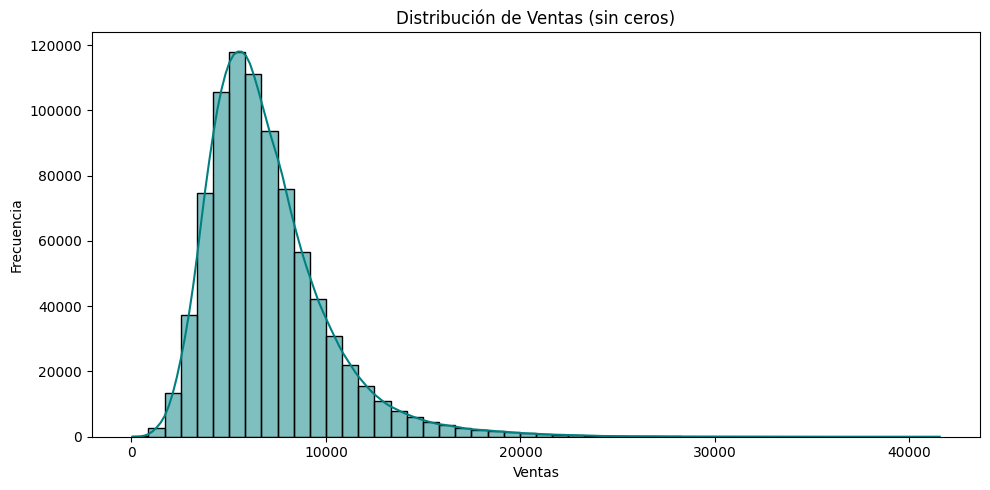

In [14]:
ventas_positivas = df[df['Sales'] > 0]['Sales']

plt.figure(figsize=(10, 5))
sns.histplot(ventas_positivas, bins=50, kde=True, color='teal')
plt.title('Distribución de Ventas (sin ceros)')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


#### 🔁 Opción 2: Escala logarítmica
Cuando la distribución está muy sesgada hacia la derecha (como en este caso), una transformación logarítmica permite visualizarla de forma más balanceada y detectar mejor la forma y los outliers.

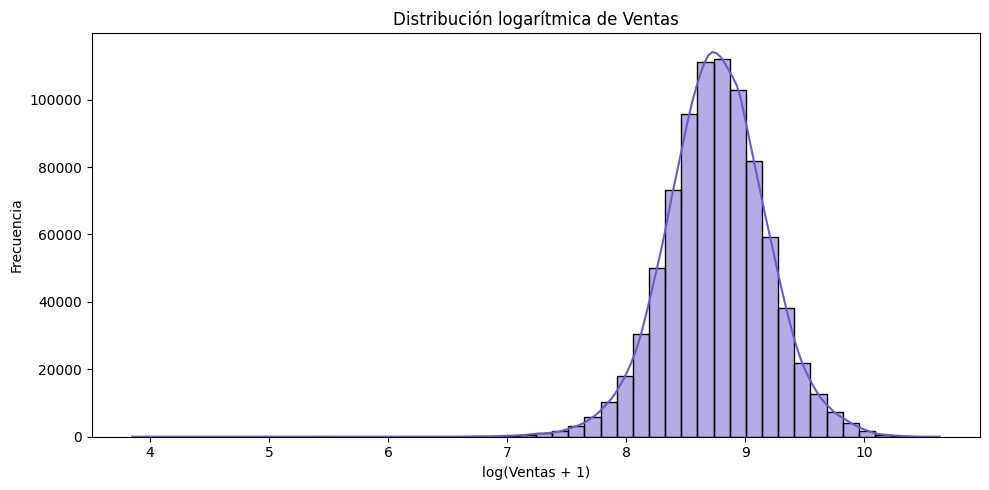

In [15]:
import numpy as np

ventas_positivas_log = np.log1p(ventas_positivas)

plt.figure(figsize=(10, 5))
sns.histplot(ventas_positivas_log, bins=50, kde=True, color='slateblue')
plt.title('Distribución logarítmica de Ventas')
plt.xlabel('log(Ventas + 1)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


## 📦 Paso 8: Boxplots para detección de outliers

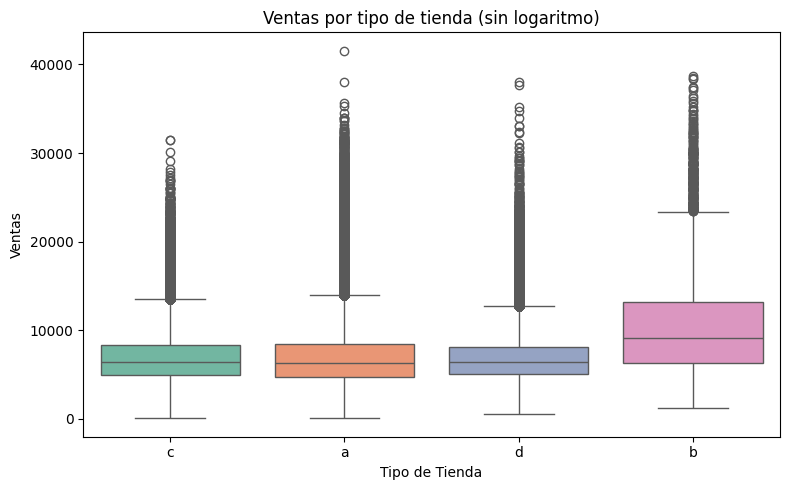

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_filtrado,
    x='StoreType',
    y='Sales',
    hue='StoreType',  # para evitar el warning
    dodge=False,       # que no se dupliquen los boxplots
    palette=colores
)
plt.legend([], [], frameon=False)  # ocultar leyenda innecesaria
plt.title('Ventas por tipo de tienda (sin logaritmo)')
plt.xlabel('Tipo de Tienda')
plt.ylabel('Ventas')
plt.tight_layout()
plt.show()


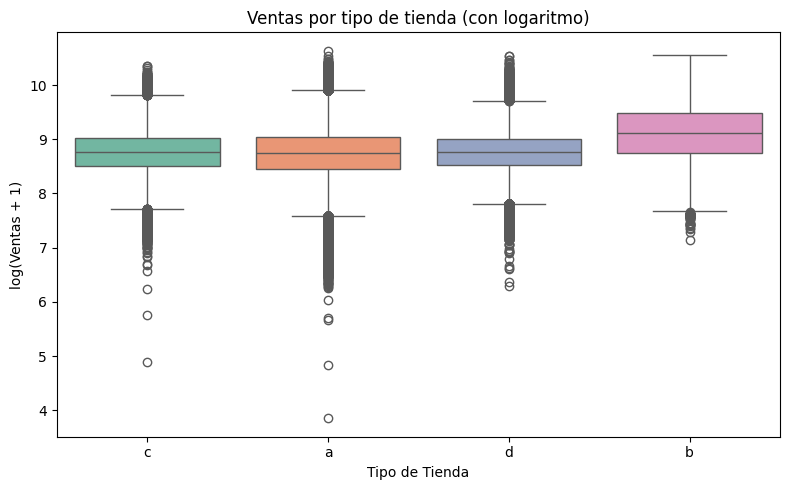

In [24]:
import numpy as np

# Agregar columna de ventas logarítmicas (log(ventas + 1))
df_filtrado['Sales_log'] = np.log1p(df_filtrado['Sales'])

plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_filtrado,
    x='StoreType',
    y='Sales_log',
    hue='StoreType',        # evitar el warning
    dodge=False,            # no duplicar boxplots
    palette=colores         # mismos colores definidos antes
)

plt.legend([], [], frameon=False)  # ocultar leyenda innecesaria
plt.title('Ventas por tipo de tienda (con logaritmo)')
plt.xlabel('Tipo de Tienda')
plt.ylabel('log(Ventas + 1)')
plt.tight_layout()
plt.show()


## 📅 Paso 10: Ventas promedio por día de la semana

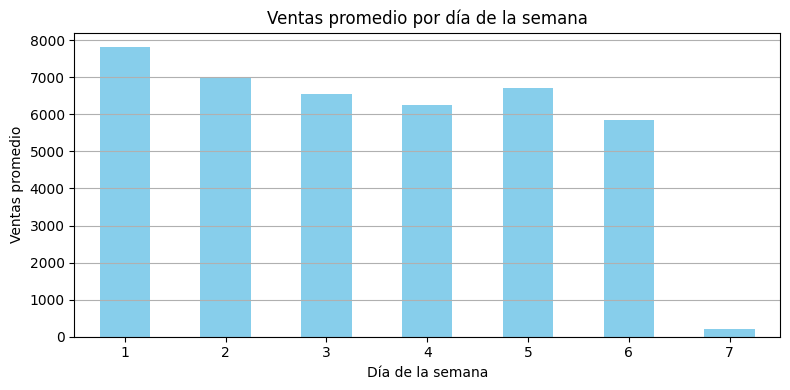

In [25]:
ventas_dia = df.groupby('DayOfWeek')['Sales'].mean()

plt.figure(figsize=(8, 4))
ventas_dia.plot(kind='bar', color='skyblue')
plt.title('Ventas promedio por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Ventas promedio')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## 🛍️ Paso 11: Ventas con vs sin promoción

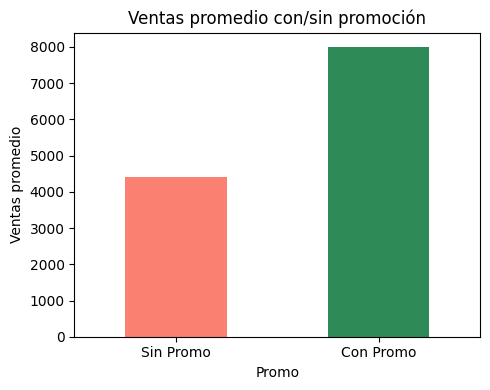

In [26]:
promo_group = df.groupby('Promo')['Sales'].mean()

plt.figure(figsize=(5, 4))
promo_group.plot(kind='bar', color=['salmon', 'seagreen'])
plt.title('Ventas promedio con/sin promoción')
plt.xticks([0, 1], ['Sin Promo', 'Con Promo'], rotation=0)
plt.ylabel('Ventas promedio')
plt.tight_layout()
plt.show()


## 🧹 Paso 12: Revisión de datos faltantes

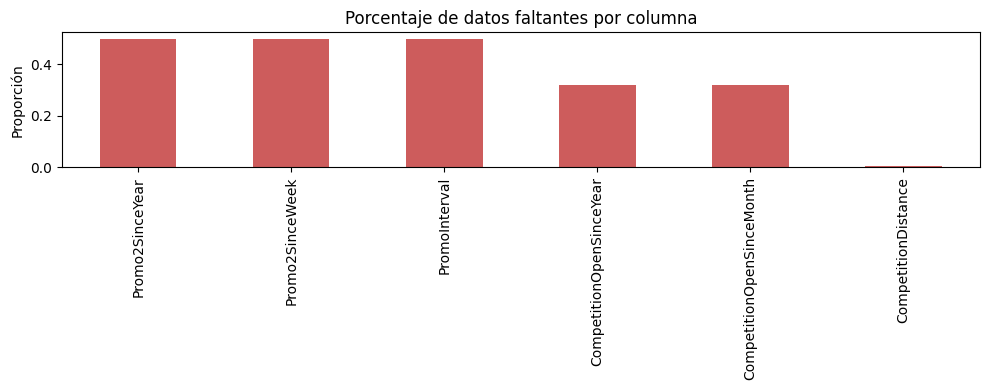

In [27]:
faltantes = df.isnull().mean().sort_values(ascending=False)

plt.figure(figsize=(10, 4))
faltantes[faltantes > 0].plot(kind='bar', color='indianred')
plt.title('Porcentaje de datos faltantes por columna')
plt.ylabel('Proporción')
plt.tight_layout()
plt.show()


## Preparación de datos para modelado

### 🧹 Paso 1: Selección de variables relevantes

In [28]:
# Copia del DataFrame original
df_model = df.copy()


### 🔍 Paso 2: Eliminar columnas innecesarias (ID, Clientes, etc.)

In [29]:
# Eliminar columnas que no queremos usar como entrada (input)
df_model = df_model.drop(['Customers'], axis=1)


### 📅 Paso 3: Ingeniería de características de fecha

In [30]:
# Extraer características temporales
df_model['Year'] = df_model['Date'].dt.year
df_model['Month'] = df_model['Date'].dt.month
df_model['Day'] = df_model['Date'].dt.day
df_model['WeekOfYear'] = df_model['Date'].dt.isocalendar().week
df_model['DayOfWeek'] = df_model['Date'].dt.dayofweek
df_model['IsWeekend'] = df_model['DayOfWeek'].isin([5, 6]).astype(int)


In [31]:
df_model = df_model.drop('Date', axis=1)


### 🔄 Paso 4: Rellenar valores faltantes

In [34]:
# Rellenar valores faltantes con lógica de negocio
df_model['CompetitionDistance'] = df_model['CompetitionDistance'].fillna(df_model['CompetitionDistance'].median())
df_model['CompetitionOpenSinceMonth'] = df_model['CompetitionOpenSinceMonth'].fillna(0)
df_model['CompetitionOpenSinceYear'] = df_model['CompetitionOpenSinceYear'].fillna(0)
df_model['Promo2SinceWeek'] = df_model['Promo2SinceWeek'].fillna(0)
df_model['Promo2SinceYear'] = df_model['Promo2SinceYear'].fillna(0)
df_model['PromoInterval'] = df_model['PromoInterval'].fillna('None')

### 🔠 Paso 5: Codificación de variables categóricas

In [35]:
# Codificar variables categóricas
df_model = pd.get_dummies(df_model, columns=[
    'StoreType', 'Assortment', 'StateHoliday', 'PromoInterval'
])

### ✅ Paso 6: Eliminar filas donde las tiendas estaban cerradas

In [36]:
# Algunas tiendas estuvieron cerradas (Open == 0)
df_model = df_model[df_model['Open'] == 1]
df_model = df_model.drop('Open', axis=1)

### 🧪 Paso 7: Separar variables independientes y dependientes

In [37]:
# Variable objetivo: Sales
X = df_model.drop('Sales', axis=1)
y = df_model['Sales']


### ✅ Paso 8: División del conjunto de datos en entrenamiento y prueba

In [39]:
from sklearn.model_selection import train_test_split

# Separar variables independientes (X) y dependiente (y)
X = df_model.drop(['Sales'], axis=1)
y = df_model['Sales']

# División en entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


### 🧹 Paso 9: Escalado de variables (para algunos modelos)

In [42]:
# Asegurar de que todas las variables categóricas estén codificadas
X_encoded = pd.get_dummies(X, drop_first=True)

# Rehacer la división con las variables codificadas
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### 🔍 Paso 10: Entrenar un modelo base

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Entrenar modelo
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predicciones
y_pred = model.predict(X_test_scaled)

# Evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


MSE: 7369272.73
R² Score: 0.24


### 📊  Paso 11: Descargar dataset limpio a utilizar 

In [45]:
df_model.to_csv("df_model_ready.csv", index=False)


## ✅ Conclusiones 

1. **Distribución de Ventas**  
   Las ventas presentan una alta concentración en valores cercanos a cero, principalmente debido a días en los que las tiendas estaban cerradas. Al eliminar esos valores y aplicar una transformación logarítmica, se logró una mejor visualización de la distribución real, revelando una dispersión significativa entre tiendas.

2. **Relación Ventas - Clientes**  
   Existe una **fuerte correlación positiva** entre el número de clientes y las ventas, lo cual valida el uso de esta variable como una de las más importantes en modelos predictivos.

3. **Influencia del Día de la Semana**  
   Las ventas promedio varían significativamente dependiendo del día de la semana, con picos los viernes y descensos marcados los domingos (día con más cierres de tiendas).

4. **Efecto de Promociones**  
   Se observó un **incremento notable en ventas** cuando las tiendas están en promoción, lo cual sugiere un impacto positivo directo de las campañas promocionales.

5. **Diferencias entre Tipos de Tiendas**  
   Se identificaron diferencias en el nivel de ventas según el tipo de tienda (`StoreType`). Estas diferencias se acentuaron al analizar los datos en escala logarítmica, mostrando que algunos tipos concentran mayores ingresos.

6. **Datos Faltantes**  
   Se encontraron valores nulos principalmente en variables relacionadas con promociones secundarias (`Promo2`) y competencia (`CompetitionOpenSinceYear/Month`). Estos fueron tratados con imputaciones lógicas y valores por defecto, para asegurar consistencia en el modelado.

7. **Preparación para el Modelado**  
   Se construyó un nuevo conjunto de datos limpio (`df_model_ready.csv`) aplicando:
   - Ingeniería de características temporales  
   - Codificación de variables categóricas  
   - Eliminación de tiendas cerradas  
   - Escalado de variables numéricas  

8. **Modelo Lineal Base**  
   Un modelo de regresión lineal simple alcanzó un **R² de 0.24**, lo cual es bajo pero útil como línea base para comparar con modelos más complejos (como XGBoost y LightGBM).





---
---
---
📌 Proyecto desarrollado por: **Nabila Isabel Padilla Resendiz**  
🎓 Data Scientist en formación | Ingeniera en Mecatrónica | Apasionada por la tecnología y el aprendizaje  
📬 Contacto: https://www.linkedin.com/in/nabilap/ 